# Correr experimentos
En este archivo está el código para correr los experimentos, hacer el estudio de las cosas y escribir los resultados en archivos CSV.
> Los archivos se guardan en la carpeta _resultados_.

In [1]:
import math, subprocess
import pandas as pd
import numpy as np
import seaborn as sns
import random, math
import os
import shutil
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import sys

## Metodo de la potencia

In [2]:
def power_iteration(A, niter, eps, num):
    b = np.ones(A.shape[1])
    b = b / np.linalg.norm(b)
    iteracion = 0

    for i in range(niter):
        old = b
        b = A @ b
        
        norm = np.linalg.norm(b)
        b = b / norm
        cos_angle = np.dot(b, old)
        if (1 - eps) < cos_angle <= 1:
            iteracion = i
            print(F"Pare en iteración: {i} del calculo del autovalor {num+1}")
            break
    Ab = A @ b
    eigenvalue = np.dot(b, Ab)
    return eigenvalue, b, iteracion

In [3]:
def power_iteration_without_eps(A, niter, eps):
    b = np.ones(A.shape[1])
    b = b / np.linalg.norm(b)

    for i in range(niter):
        old = b
        b = A @ b
        
        norm = np.linalg.norm(b)
        b = b / norm
        cos_angle = np.dot(b, old)
    Ab = A @ b
    eigenvalue = np.dot(b, Ab)
    return eigenvalue, b

In [4]:
def eig(A, niter, eps):
    A_aux = A.copy()
    iteraciones = []
    eigenvalues = []
    eigenvectors = np.zeros((A_aux.shape[0], A.shape[0]))
    for i in range(0, len(A)):
        l, v, it = power_iteration(A, niter, eps, i)
        iteraciones.append(it)
        eigenvalues.append(l)
        eigenvectors[:, i] = v
        A = A - l * np.outer(v, v)
    return np.array(eigenvalues), eigenvectors, iteraciones

In [5]:
def eig_without_eps(A, niter, eps):
    A_aux = A.copy()
    eigenvalues = []
    iteraciones = []
    eigenvectors = np.zeros((A_aux.shape[0], A.shape[0]))
    for i in range(0, len(A)):
        l, v = power_iteration_without_eps(A, niter, eps)
        eigenvalues.append(l)
        eigenvectors[:, i] = v
        A = A - l * np.outer(v, v)
    return np.array(eigenvalues), eigenvectors

In [6]:
def abs_val(num):
    if num < 0:
        return (-1)*num
    return num

## Lectura de matrices, ejecución de experimentos y formateo de datos

In [7]:
def correr_experimento(archivo_instancia, iteraciones, convergencia):
    process = subprocess.Popen(
        ["./metodo_potencia", archivo_instancia, str(iteraciones), str(convergencia)], 
        stderr=subprocess.PIPE, 
        stdout=subprocess.PIPE, 
        stdin=subprocess.PIPE, 
        universal_newlines = True)
    exit_code = process.wait()
    if exit_code != 0: 
        print(F"Hubo un error en la experimentacion con la instancia {archivo_instancia}")
        
    process.stdin.close();
    process.stdout.close();
    process.stderr.close();

In [9]:
def leer_resultados(eigenvalues_path, eigenvectors_path):
    with open(eigenvalues_path,'rt') as filedata:
        eigenvalues = np.genfromtxt(eigenvalues_path, dtype=None, unpack=True)
    
    with open(eigenvectors_path,'rt') as filedata:
        eigenvectors = np.genfromtxt(eigenvectors_path, dtype=None, unpack=True)
    return [eigenvalues, eigenvectors]

In [8]:
def leer_matriz_completa(path_instancia):
    matrix = np.loadtxt(path_instancia, dtype='i', delimiter=' ')
    return matrix

In [10]:
def impresion_de_datos(eigenvalues, eigenvectors):
    print("Los autovalores obtenidos son: ")
    for i in range(0, len(eigenvalues)):
        print(F"Resultado {i+1}")
        print(F"Autovalor = {eigenvalues[i]}")
        print(F"Autovector = {eigenvectors[i]}")
        print("")

In [11]:
def impresion_comparacion_datos(eigenvalues_sc, eigenvalues_cc, eigenvectors_sc, eigenvectors_cc):
    print("Los resultados son: ")
    for i in range(0, len(eigenvalues_sc)):
        print(F"Resultado {i+1}:")
        print(F"Autovalor con cota = {eigenvalues_cc[i]} y sin cota: {eigenvalues_sc[i]}")
        #print(F"Autovector con cota = {eigenvectors_cc[i]} y sin cota: {eigenvectors_sc[i]}")

# Corremos los experimentos

### Experimento de matriz diagonal

In [12]:
N = 10
D = np.diag(range(N, 0, -1))

v = np.ones((D.shape[0], 1))
v = v / np.linalg.norm(v)

# Matriz de Householder
B = np.eye(D.shape[0]) - 2 * (v @ v.T)

M = B.T @ D @ B

In [13]:
# Para todos los eigen el ejemplo anterior de householder.

print("Método con convergencia")
l_con, v_con, it = eig(M, 5_000, 1e-6)
print("")
print("Método sin convergencia")
l_sin, v_sin = eig_without_eps(M, 5_000, 1e-6)

print("Resultados: ")
impresion_comparacion_datos(l_sin, l_con, v_sin, v_con)

Método con convergencia
Pare en iteración: 41 del calculo del autovalor 1
Pare en iteración: 38 del calculo del autovalor 2
Pare en iteración: 34 del calculo del autovalor 3
Pare en iteración: 31 del calculo del autovalor 4
Pare en iteración: 27 del calculo del autovalor 5
Pare en iteración: 23 del calculo del autovalor 6
Pare en iteración: 19 del calculo del autovalor 7
Pare en iteración: 14 del calculo del autovalor 8
Pare en iteración: 9 del calculo del autovalor 9
Pare en iteración: 1 del calculo del autovalor 10

Método sin convergencia
Resultados: 
Los resultados son: 
Resultado 1:
Autovalor con cota = 9.999856664952743 y sin cota: 10.0
Resultado 2:
Autovalor con cota = 9.000054247903385 y sin cota: 9.000000000000005
Resultado 3:
Autovalor con cota = 8.000028970597613 y sin cota: 8.000000000000005
Resultado 4:
Autovalor con cota = 7.000048884912049 y sin cota: 7.0000000000000036
Resultado 5:
Autovalor con cota = 6.000024445438392 y sin cota: 5.999999999999999
Resultado 6:
Autoval

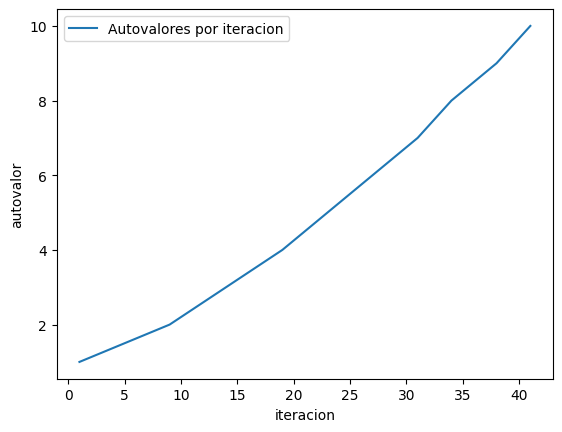

In [14]:
datos_iteracion = []
for i in range(0, len(it)):
    datos_iteracion.append([it[i], l_con[i]])

df_iteracion = pd.DataFrame(datos_iteracion, columns=["iteracion", "autovalor"])

name = F"Autovalores por iteracion"
fig = sns.lineplot(
    data=df_iteracion, 
    x='iteracion', 
    y='autovalor',
    label=name
);

fig.set(xlabel='iteracion', ylabel='autovalor');
plt.savefig("graficos/autovalores_con_cota.svg", bbox_inches = 'tight');

In [15]:
diferencia = []
for i in range(0, len(l_con)):
    diff = l_sin[i] - l_con[i];
    diferencia.append(abs_val(diff))

print(np.linalg.norm(diferencia))

0.00016810373591322685


### Experimentación matrices

In [16]:
path_matriz = F"./ejemplos"

## Revision caso 1

In [17]:
# Path de los resultados
path_eigenvalues_exp1 = F"{path_matriz}/matriz1.txt-autovalores.out"
path_eigenvectors_exp1 = F"{path_matriz}/matriz1.txt-autovectores.out"

In [18]:
correr_experimento(F"{path_matriz}/matriz1.txt", 1000, 0.001)

# Renombramos los archivos
os.rename(F"{path_eigenvalues_exp1}", F"{path_eigenvalues_exp1}-1")
os.rename(F"{path_eigenvectors_exp1}", F"{path_eigenvectors_exp1}-1")

In [19]:
path_eigenvalues_1 = F"{path_eigenvalues_exp1}-1"
path_eigenvectors_1 = F"{path_eigenvectors_exp1}-1"
caso1_l, caso1_v = leer_resultados(path_eigenvalues_1, path_eigenvectors_1)
impresion_de_datos(caso1_l, caso1_v)

Los autovalores obtenidos son: 
Resultado 1
Autovalor = -2
Autovector = [0.948683 0.316228]

Resultado 2
Autovalor = -1
Autovector = [0.921635 0.388057]



In [20]:
path_archivo = F"{path_matriz}/matriz1.txt"
correr_experimento(path_archivo, 100000, 0.0001)

os.rename(F"{path_eigenvalues_exp1}", F"{path_eigenvalues_exp1}-1w")
os.rename(F"{path_eigenvectors_exp1}", F"{path_eigenvectors_exp1}-1w")

In [21]:
path_eigenvalues_1w = F"{path_eigenvalues_exp1}-1w"
path_eigenvectors_1w = F"{path_eigenvectors_exp1}-1w"

caso1_l_w, caso1_v_w = leer_resultados(path_eigenvalues_1w, path_eigenvectors_1w)
impresion_de_datos(caso1_l_w, caso1_v_w)

Los autovalores obtenidos son: 
Resultado 1
Autovalor = -2
Autovector = [0.948683 0.316228]

Resultado 2
Autovalor = -1
Autovector = [0.921635 0.388057]



### Revision caso 2

In [22]:
# Path de los resultados
path_eigenvalues_exp2 = F"{path_matriz}/matriz2.txt-autovalores.out"
path_eigenvectors_exp2 = F"{path_matriz}/matriz2.txt-autovectores.out"

In [23]:
correr_experimento(F"{path_matriz}/matriz2.txt", 1000, 0.001)

# Renombramos los archivos
os.rename(F"{path_eigenvalues_exp2}", F"{path_eigenvalues_exp2}-2")
os.rename(F"{path_eigenvectors_exp2}", F"{path_eigenvectors_exp2}-2")

In [24]:
path_eigenvalues_2 = F"{path_eigenvalues_exp2}-2"
path_eigenvectors_2 = F"{path_eigenvectors_exp2}-2"
caso2_l, caso2_v = leer_resultados(path_eigenvalues_2, path_eigenvectors_2)
impresion_de_datos(caso2_l, caso2_v)

Los autovalores obtenidos son: 
Resultado 1
Autovalor = 5.08083
Autovector = [-0.340262 -0.876609  0.340262]

Resultado 2
Autovalor = 1.7879
Autovector = [-0.158746 -0.974474  0.158746]

Resultado 3
Autovalor = 0.0238446
Autovector = [-0.156162 -0.975309  0.156162]



In [25]:
correr_experimento(F"{path_matriz}/matriz2.txt", 100000, 0.00001)
# Renombramos los archivos
os.rename(F"{path_eigenvalues_exp2}", F"{path_eigenvalues_exp2}-2w")
os.rename(F"{path_eigenvectors_exp2}", F"{path_eigenvectors_exp2}-2w")

In [26]:
path_eigenvalues_2w = F"{path_eigenvalues_exp2}-2w"
path_eigenvectors_2w = F"{path_eigenvectors_exp2}-2w"
caso2_l_w, caso2_v_w = leer_resultados(path_eigenvalues_2w, path_eigenvectors_2w)

impresion_de_datos(caso2_l_w, caso2_v_w)

Los autovalores obtenidos son: 
Resultado 1
Autovalor = 5.01271
Autovector = [-0.346924 -0.871371  0.346924]

Resultado 2
Autovalor = 1.96799
Autovector = [-0.149219 -0.97748   0.149219]

Resultado 3
Autovalor = 0.0033902
Autovector = [-0.148851 -0.977592  0.148851]

